# Hari 3: Pembersihan Data (Data Cleaning) dan Transformasi Data (Data Transformation)

## Import Library yang Dibutuhkan

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur tampilan grafik
plt.style.use('seaborn-v0_8')
sns.set(font_scale=1.2)

# Mengabaikan warning
import warnings
warnings.filterwarnings('ignore')

## 1. Membuat Dataset Contoh

In [7]:
# Membuat dataset contoh dengan beberapa masalah umum
data = {
    'Nama': ['Andi', 'Budi', 'Citra', 'Deni', 'Eka', 'Fani', 'Gita', None, 'Indra', 'Joko'],
    'Usia': [25, 30, 22, np.nan, 28, 35, 29, 31, 27, 33],
    'Gaji': [5000000, 7500000, 4500000, 9000000, 6500000, np.nan, 8000000, 5500000, 7000000, 8500000],
    'Departemen': ['IT', 'Marketing', 'Finance', 'HR', 'IT', 'Marketing', 'Finance', 'HR', 'IT', None],
    'Pengalaman': ['3 tahun', '7 tahun', '1 tahun', '10 tahun', '5 tahun', '8 tahun', '4 tahun', '6 tahun', '3 tahun', '9 tahun'],
    'Nilai_Kinerja': [85, 92, 78, 88, -999, 90, 82, 75, 999, 87],
    'Tanggal_Masuk': ['2020-01-15', '2017-05-20', '2022-03-10', 'invalid date', '2019-08-05', '2016-11-30', '2020-07-22', '2018-02-14', '2021-04-18', '2015-09-01']
}

df = pd.DataFrame(data)
print("Dataset Awal:")
display(df)

# Informasi dataset
print("Informasi Dataset:")
df.info()

Dataset Awal:


,Nama,Usia,Gaji,Departemen,Pengalaman,Nilai_Kinerja,Tanggal_Masuk
0,Andi,25.0,5000000.0,IT,3 tahun,85,2020-01-15
1,Budi,30.0,7500000.0,Marketing,7 tahun,92,2017-05-20
2,Citra,22.0,4500000.0,Finance,1 tahun,78,2022-03-10
3,Deni,NaN,9000000.0,HR,10 tahun,88,invalid date
4,Eka,28.0,6500000.0,IT,5 tahun,-999,2019-08-05
5,Fani,35.0,NaN,Marketing,8 tahun,90,2016-11-30
6,Gita,29.0,8000000.0,Finance,4 tahun,82,2020-07-22
7,None,31.0,5500000.0,HR,6 tahun,75,2018-02-14
8,Indra,27.0,7000000.0,IT,3 tahun,999,2021-04-18
9,Joko,33.0,8500000.0,None,9 tahun,87,2015-09-01


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Nama           9 non-null      object 
 1   Usia           9 non-null      float64
 2   Gaji           9 non-null      float64
 3   Departemen     9 non-null      object 
 4   Pengalaman     10 non-null     object 
 5   Nilai_Kinerja  10 non-null     int64  
 6   Tanggal_Masuk  10 non-null     object 
dtypes: float64(2), int64(1), object(4)
memory usage: 692.0+ bytes


## 2. Pembersihan Data (Data Cleaning)

### 2.1 Menangani Missing Values

Jumlah Missing Values per Kolom:
Nama             1
Usia             1
Gaji             1
Departemen       1
Pengalaman       0
Nilai_Kinerja    0
Tanggal_Masuk    0
dtype: int64


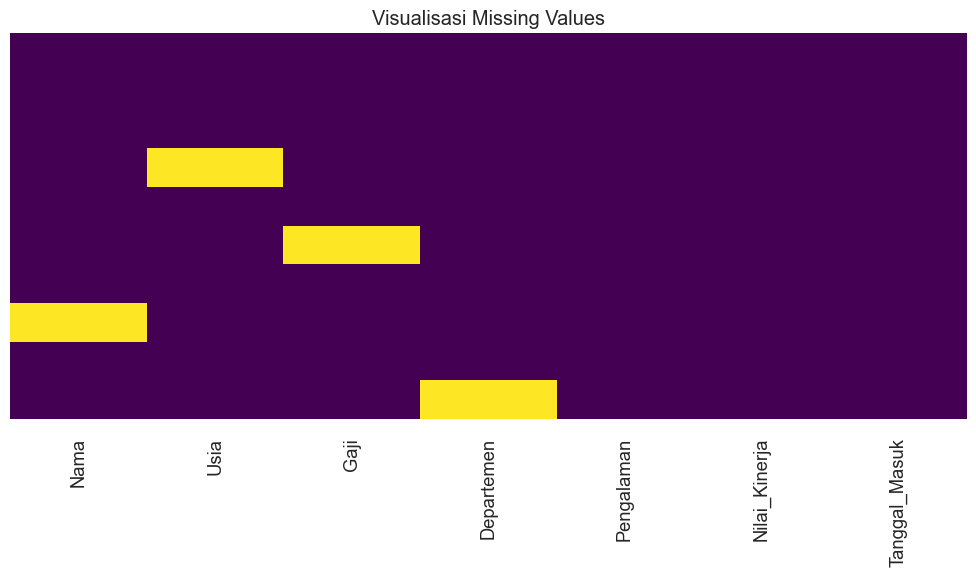

Dataset setelah menghapus baris dengan missing values:


,Nama,Usia,Gaji,Departemen,Pengalaman,Nilai_Kinerja,Tanggal_Masuk
0,Andi,25.0,5000000.0,IT,3 tahun,85,2020-01-15
1,Budi,30.0,7500000.0,Marketing,7 tahun,92,2017-05-20
2,Citra,22.0,4500000.0,Finance,1 tahun,78,2022-03-10
4,Eka,28.0,6500000.0,IT,5 tahun,-999,2019-08-05
6,Gita,29.0,8000000.0,Finance,4 tahun,82,2020-07-22
8,Indra,27.0,7000000.0,IT,3 tahun,999,2021-04-18


Dataset setelah mengisi missing values:


,Nama,Usia,Gaji,Departemen,Pengalaman,Nilai_Kinerja,Tanggal_Masuk
0,Andi,25.000000,5.000000e+06,IT,3 tahun,85,2020-01-15
1,Budi,30.000000,7.500000e+06,Marketing,7 tahun,92,2017-05-20
2,Citra,22.000000,4.500000e+06,Finance,1 tahun,78,2022-03-10
3,Deni,28.888889,9.000000e+06,HR,10 tahun,88,invalid date
4,Eka,28.000000,6.500000e+06,IT,5 tahun,-999,2019-08-05
5,Fani,35.000000,6.833333e+06,Marketing,8 tahun,90,2016-11-30
6,Gita,29.000000,8.000000e+06,Finance,4 tahun,82,2020-07-22
7,Unknown,31.000000,5.500000e+06,HR,6 tahun,75,2018-02-14
8,Indra,27.000000,7.000000e+06,IT,3 tahun,999,2021-04-18
9,Joko,33.000000,8.500000e+06,IT,9 tahun,87,2015-09-01


In [8]:
# Memeriksa missing values
print("Jumlah Missing Values per Kolom:")
print(df.isnull().sum())

# Visualisasi missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Visualisasi Missing Values')
plt.tight_layout()
plt.show()

# 1. Menghapus baris dengan missing values
df_drop = df.dropna()
print("Dataset setelah menghapus baris dengan missing values:")
display(df_drop)

# 2. Mengisi missing values dengan nilai tertentu
df_fill = df.copy()

# Mengisi missing values pada kolom Nama dengan 'Unknown'
df_fill['Nama'].fillna('Unknown', inplace=True)

# Mengisi missing values pada kolom numerik dengan mean
df_fill['Usia'].fillna(df_fill['Usia'].mean(), inplace=True)
df_fill['Gaji'].fillna(df_fill['Gaji'].mean(), inplace=True)

# Mengisi missing values pada kolom kategorikal dengan modus
df_fill['Departemen'].fillna(df_fill['Departemen'].mode()[0], inplace=True)

print("Dataset setelah mengisi missing values:")
display(df_fill)

### 2.2 Menangani Outliers

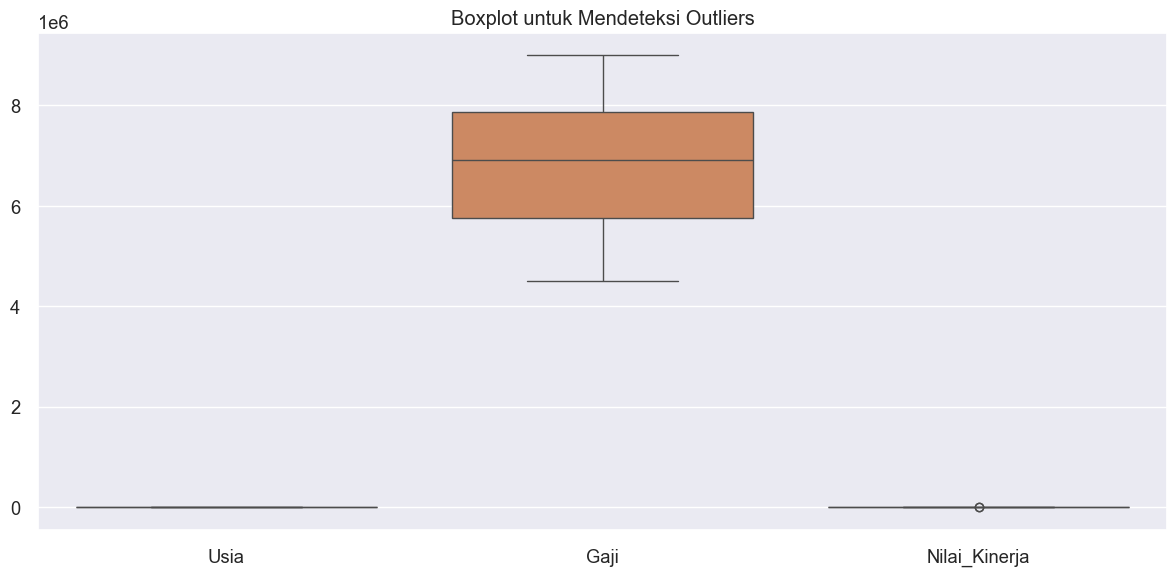

Dataset setelah menangani outliers:


,Nama,Usia,Gaji,Departemen,Pengalaman,Nilai_Kinerja,Tanggal_Masuk
0,Andi,25.000000,5.000000e+06,IT,3 tahun,85.00,2020-01-15
1,Budi,30.000000,7.500000e+06,Marketing,7 tahun,92.00,2017-05-20
2,Citra,22.000000,4.500000e+06,Finance,1 tahun,78.00,2022-03-10
3,Deni,28.888889,9.000000e+06,HR,10 tahun,88.00,invalid date
4,Eka,28.000000,6.500000e+06,IT,5 tahun,63.25,2019-08-05
5,Fani,35.000000,6.833333e+06,Marketing,8 tahun,90.00,2016-11-30
6,Gita,29.000000,8.000000e+06,Finance,4 tahun,82.00,2020-07-22
7,Unknown,31.000000,5.500000e+06,HR,6 tahun,75.00,2018-02-14
8,Indra,27.000000,7.000000e+06,IT,3 tahun,105.25,2021-04-18
9,Joko,33.000000,8.500000e+06,IT,9 tahun,87.00,2015-09-01


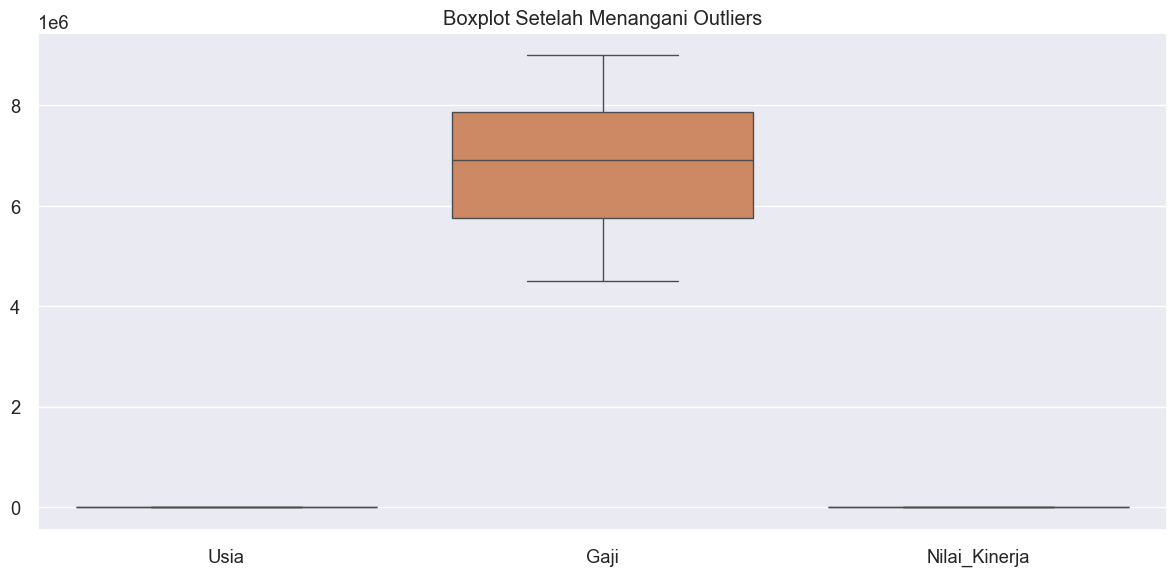

In [9]:
# Mendeteksi outliers dengan visualisasi boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_fill[['Usia', 'Gaji', 'Nilai_Kinerja']])
plt.title('Boxplot untuk Mendeteksi Outliers')
plt.tight_layout()
plt.show()

# Menangani outliers dengan metode IQR (Interquartile Range)
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Mengganti outliers dengan batas atas dan batas bawah
    df_clean = df.copy()
    df_clean.loc[df_clean[column] < lower_bound, column] = lower_bound
    df_clean.loc[df_clean[column] > upper_bound, column] = upper_bound
    
    return df_clean

# Menangani outliers pada kolom Nilai_Kinerja
df_no_outliers = handle_outliers(df_fill, 'Nilai_Kinerja')

# Menangani nilai khusus (-999 dan 999) pada kolom Nilai_Kinerja
df_no_outliers.loc[df_no_outliers['Nilai_Kinerja'] == -999, 'Nilai_Kinerja'] = df_no_outliers['Nilai_Kinerja'].median()
df_no_outliers.loc[df_no_outliers['Nilai_Kinerja'] == 999, 'Nilai_Kinerja'] = df_no_outliers['Nilai_Kinerja'].median()

print("Dataset setelah menangani outliers:")
display(df_no_outliers)

# Visualisasi setelah menangani outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_no_outliers[['Usia', 'Gaji', 'Nilai_Kinerja']])
plt.title('Boxplot Setelah Menangani Outliers')
plt.tight_layout()
plt.show()

### 2.3 Menangani Format Data yang Tidak Konsisten

In [10]:
# Menangani format tanggal yang tidak valid
df_clean = df_no_outliers.copy()

# Mengkonversi kolom Tanggal_Masuk ke format datetime
df_clean['Tanggal_Masuk'] = pd.to_datetime(df_clean['Tanggal_Masuk'], errors='coerce')

# Mengisi tanggal yang tidak valid dengan tanggal median
median_date = pd.to_datetime(df_clean['Tanggal_Masuk'].dropna()).median()
df_clean['Tanggal_Masuk'].fillna(median_date, inplace=True)

# Ekstrak pengalaman kerja dari string ke numerik (tahun)
df_clean['Pengalaman_Tahun'] = df_clean['Pengalaman'].str.extract('(\d+)').astype(int)

print("Dataset setelah menangani format data yang tidak konsisten:")
display(df_clean)

Dataset setelah menangani format data yang tidak konsisten:


,Nama,Usia,Gaji,Departemen,Pengalaman,Nilai_Kinerja,Tanggal_Masuk,Pengalaman_Tahun
0,Andi,25.000000,5.000000e+06,IT,3 tahun,85.00,2020-01-15,3
1,Budi,30.000000,7.500000e+06,Marketing,7 tahun,92.00,2017-05-20,7
2,Citra,22.000000,4.500000e+06,Finance,1 tahun,78.00,2022-03-10,1
3,Deni,28.888889,9.000000e+06,HR,10 tahun,88.00,2019-08-05,10
4,Eka,28.000000,6.500000e+06,IT,5 tahun,63.25,2019-08-05,5
5,Fani,35.000000,6.833333e+06,Marketing,8 tahun,90.00,2016-11-30,8
6,Gita,29.000000,8.000000e+06,Finance,4 tahun,82.00,2020-07-22,4
7,Unknown,31.000000,5.500000e+06,HR,6 tahun,75.00,2018-02-14,6
8,Indra,27.000000,7.000000e+06,IT,3 tahun,105.25,2021-04-18,3
9,Joko,33.000000,8.500000e+06,IT,9 tahun,87.00,2015-09-01,9


## 3. Transformasi Data (Data Transformation)

### 3.1 Normalisasi dan Standardisasi Data

Dataset setelah normalisasi (Min-Max Scaling):


,Usia,Gaji,Nilai_Kinerja,Pengalaman_Tahun
0,0.230769,0.111111,0.517857,0.222222
1,0.615385,0.666667,0.684524,0.666667
2,0.000000,0.000000,0.351190,0.000000
3,0.529915,1.000000,0.589286,1.000000
4,0.461538,0.444444,0.000000,0.444444


Dataset setelah standardisasi (Z-score Scaling):


,Usia,Gaji,Nilai_Kinerja,Pengalaman_Tahun
0,-1.091726e+00,-1.296362,0.042406,-0.940647
1,3.119218e-01,0.471405,0.702050,0.506502
2,-1.933915e+00,-1.649916,-0.617238,-1.664222
3,-9.973519e-16,1.532065,0.325110,1.591864
4,-2.495374e-01,-0.235702,-2.007202,-0.217072


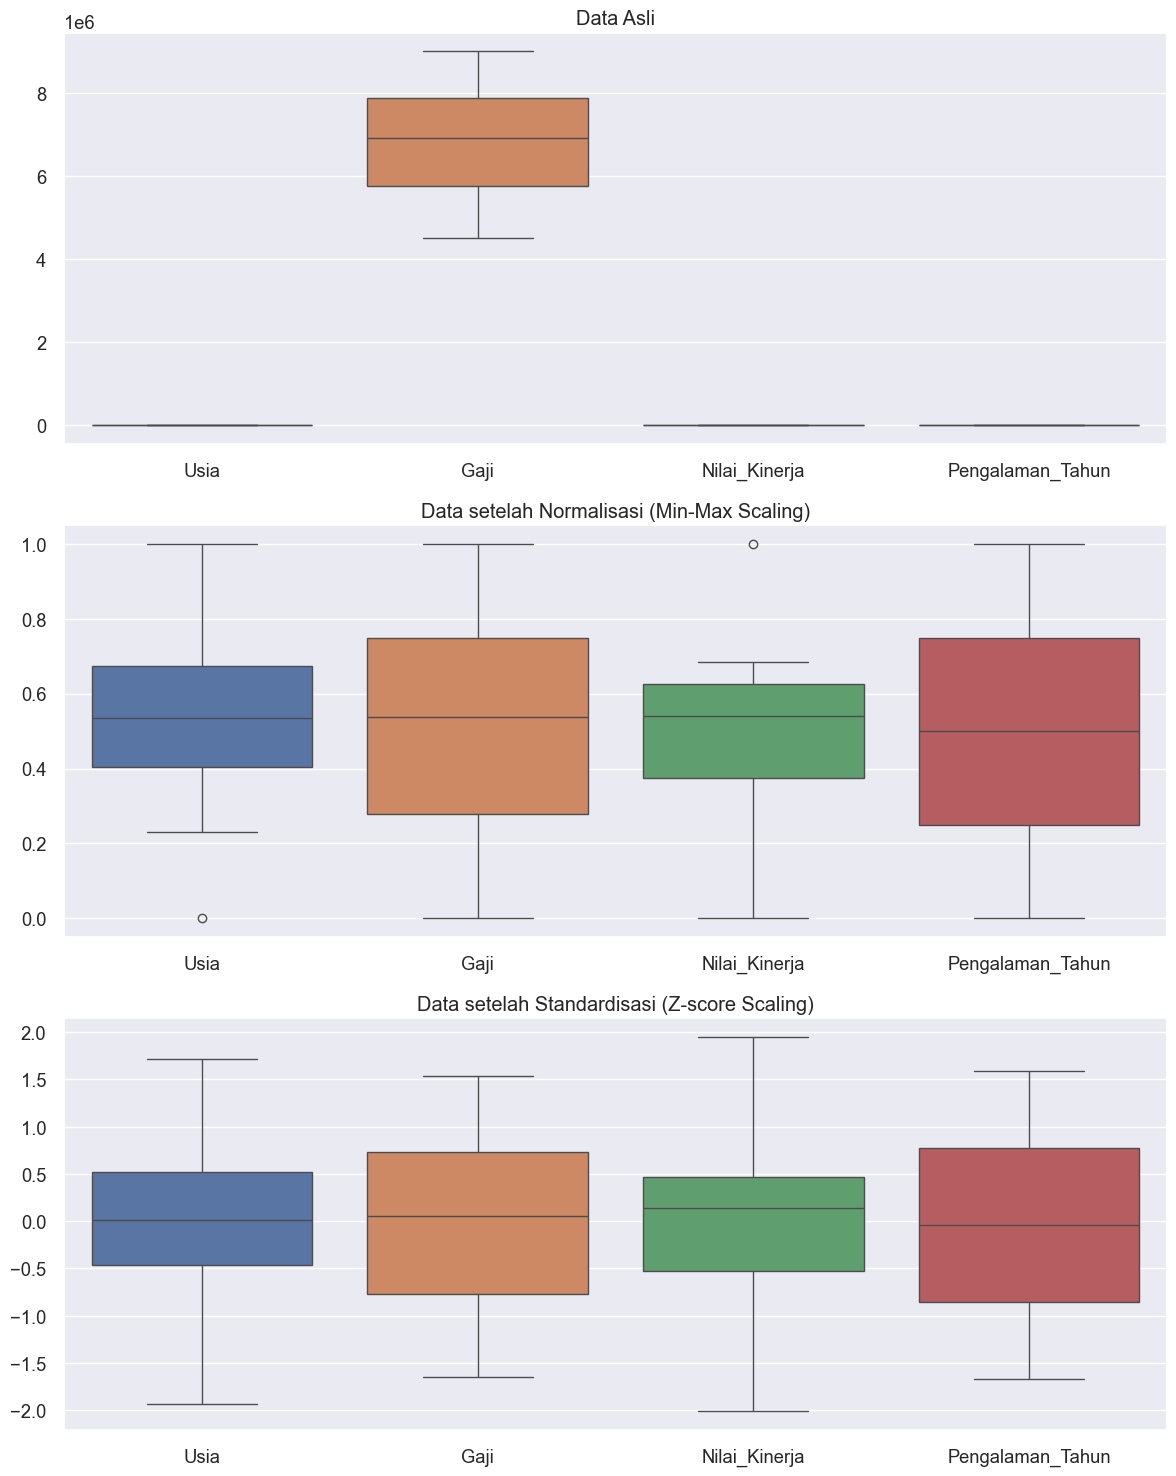

In [11]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Memilih kolom numerik untuk normalisasi dan standardisasi
numeric_cols = ['Usia', 'Gaji', 'Nilai_Kinerja', 'Pengalaman_Tahun']

# 1. Normalisasi (Min-Max Scaling)
min_max_scaler = MinMaxScaler()
df_normalized = df_clean.copy()
df_normalized[numeric_cols] = min_max_scaler.fit_transform(df_clean[numeric_cols])

print("Dataset setelah normalisasi (Min-Max Scaling):")
display(df_normalized[numeric_cols].head())

# 2. Standardisasi (Z-score Scaling)
standard_scaler = StandardScaler()
df_standardized = df_clean.copy()
df_standardized[numeric_cols] = standard_scaler.fit_transform(df_clean[numeric_cols])

print("Dataset setelah standardisasi (Z-score Scaling):")
display(df_standardized[numeric_cols].head())

# Visualisasi perbandingan data asli, normalisasi, dan standardisasi
fig, axes = plt.subplots(3, 1, figsize=(12, 15))

# Data asli
sns.boxplot(data=df_clean[numeric_cols], ax=axes[0])
axes[0].set_title('Data Asli')

# Data normalisasi
sns.boxplot(data=df_normalized[numeric_cols], ax=axes[1])
axes[1].set_title('Data setelah Normalisasi (Min-Max Scaling)')

# Data standardisasi
sns.boxplot(data=df_standardized[numeric_cols], ax=axes[2])
axes[2].set_title('Data setelah Standardisasi (Z-score Scaling)')

plt.tight_layout()
plt.show()

### 3.2 Transformasi Data Kategorikal

In [12]:
# 1. Label Encoding
from sklearn.preprocessing import LabelEncoder

df_encoded = df_clean.copy()

# Label encoding untuk kolom Departemen
label_encoder = LabelEncoder()
df_encoded['Departemen_Encoded'] = label_encoder.fit_transform(df_encoded['Departemen'])

print("Dataset setelah Label Encoding:")
display(pd.DataFrame({
    'Departemen': df_encoded['Departemen'],
    'Departemen_Encoded': df_encoded['Departemen_Encoded']
}).drop_duplicates().sort_values('Departemen_Encoded'))

# 2. One-Hot Encoding
df_onehot = pd.get_dummies(df_clean, columns=['Departemen'], prefix='Dept')

print("Dataset setelah One-Hot Encoding:")
display(df_onehot.head())

Dataset setelah Label Encoding:


,Departemen,Departemen_Encoded
2,Finance,0
3,HR,1
0,IT,2
1,Marketing,3


Dataset setelah One-Hot Encoding:


,Nama,Usia,Gaji,Pengalaman,Nilai_Kinerja,Tanggal_Masuk,Pengalaman_Tahun,Dept_Finance,Dept_HR,Dept_IT,Dept_Marketing
0,Andi,25.000000,5000000.0,3 tahun,85.00,2020-01-15,3,False,False,True,False
1,Budi,30.000000,7500000.0,7 tahun,92.00,2017-05-20,7,False,False,False,True
2,Citra,22.000000,4500000.0,1 tahun,78.00,2022-03-10,1,True,False,False,False
3,Deni,28.888889,9000000.0,10 tahun,88.00,2019-08-05,10,False,True,False,False
4,Eka,28.000000,6500000.0,5 tahun,63.25,2019-08-05,5,False,False,True,False


### 3.3 Transformasi Fitur

Dataset setelah transformasi fitur:


,Nama,Usia,Gaji,Departemen,Pengalaman,Nilai_Kinerja,Tanggal_Masuk,Pengalaman_Tahun,Gaji_Per_Tahun_Pengalaman,Lama_Bekerja,Kategori_Usia
0,Andi,25.000000,5000000.0,IT,3 tahun,85.00,2020-01-15,3,1.666667e+06,5.338809,20-29
1,Budi,30.000000,7500000.0,Marketing,7 tahun,92.00,2017-05-20,7,1.071429e+06,7.994524,20-29
2,Citra,22.000000,4500000.0,Finance,1 tahun,78.00,2022-03-10,1,4.500000e+06,3.189596,20-29
3,Deni,28.888889,9000000.0,HR,10 tahun,88.00,2019-08-05,10,9.000000e+05,5.785079,20-29
4,Eka,28.000000,6500000.0,IT,5 tahun,63.25,2019-08-05,5,1.300000e+06,5.785079,20-29


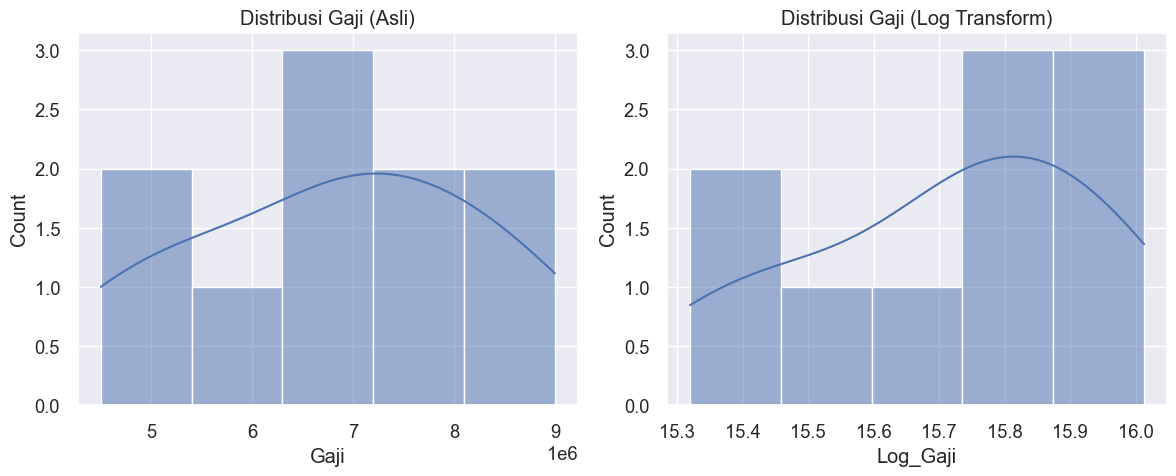

In [13]:
# 1. Membuat fitur baru berdasarkan fitur yang ada
df_transform = df_clean.copy()

# Menghitung gaji per tahun pengalaman
df_transform['Gaji_Per_Tahun_Pengalaman'] = df_transform['Gaji'] / df_transform['Pengalaman_Tahun']

# Menghitung lama bekerja (dalam tahun)
df_transform['Lama_Bekerja'] = (pd.Timestamp('now') - df_transform['Tanggal_Masuk']).dt.days / 365.25

# Kategorisasi usia
bins = [20, 30, 40, 50]
labels = ['20-29', '30-39', '40-49']
df_transform['Kategori_Usia'] = pd.cut(df_transform['Usia'], bins=bins, labels=labels)

print("Dataset setelah transformasi fitur:")
display(df_transform.head())

# 2. Transformasi logaritmik untuk data yang tidak terdistribusi normal
# Visualisasi distribusi Gaji sebelum transformasi
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_transform['Gaji'], kde=True)
plt.title('Distribusi Gaji (Asli)')

# Transformasi logaritmik
df_transform['Log_Gaji'] = np.log1p(df_transform['Gaji'])  # log1p untuk menghindari log(0)

# Visualisasi distribusi Gaji setelah transformasi logaritmik
plt.subplot(1, 2, 2)
sns.histplot(df_transform['Log_Gaji'], kde=True)
plt.title('Distribusi Gaji (Log Transform)')

plt.tight_layout()
plt.show()

## 4. Menyimpan Data yang Sudah Dibersihkan dan Ditransformasi

In [14]:
# Menyimpan data yang sudah dibersihkan dan ditransformasi ke CSV
df_transform.to_csv('data_clean_transform.csv', index=False)
print("Data yang sudah dibersihkan dan ditransformasi telah disimpan ke 'data_clean_transform.csv'")

Data yang sudah dibersihkan dan ditransformasi telah disimpan ke 'data_clean_transform.csv'


## 5. Kesimpulan

Dalam notebook ini, kita telah mempelajari dan mempraktikkan berbagai teknik pembersihan dan transformasi data, antara lain:

### Pembersihan Data (Data Cleaning):
1. **Menangani Missing Values**
   - Menghapus baris dengan missing values
   - Mengisi missing values dengan nilai tertentu (mean, median, mode)

2. **Menangani Outliers**
   - Mendeteksi outliers dengan visualisasi boxplot
   - Menangani outliers dengan metode IQR (Interquartile Range)
   - Mengganti nilai khusus (-999, 999) dengan nilai yang lebih representatif

3. **Menangani Format Data yang Tidak Konsisten**
   - Mengkonversi format tanggal
   - Ekstraksi informasi dari string ke numerik

### Transformasi Data (Data Transformation):
1. **Normalisasi dan Standardisasi Data**
   - Min-Max Scaling (Normalisasi)
   - Z-score Scaling (Standardisasi)

2. **Transformasi Data Kategorikal**
   - Label Encoding
   - One-Hot Encoding

3. **Transformasi Fitur**
   - Membuat fitur baru berdasarkan fitur yang ada
   - Kategorisasi data numerik
   - Transformasi logaritmik untuk data yang tidak terdistribusi normal

Pembersihan dan transformasi data merupakan langkah penting dalam proses analisis data dan machine learning. Dengan data yang bersih dan terformat dengan baik, kita dapat memperoleh insight yang lebih akurat dan membangun model yang lebih baik.